# Day 18: K-Nearest Neighbors (KNN) 🤝

## What is KNN?
- **Lazy learning algorithm** (no explicit training).
- Works by **storing the dataset** and making predictions based on **neighbors**.
- For a new data point:
  1. Calculate its distance from all training points.
  2. Pick the **K nearest neighbors**.
  3. Take a **majority vote (classification)** or **average (regression)**.

### Distance Metrics
- Euclidean Distance (most common)
- Manhattan Distance
- Minkowski Distance

### Pros
✅ Simple & intuitive  
✅ Works well on smaller datasets  
✅ No training time  

### Cons
❌ Slow for large datasets  
❌ Sensitive to irrelevant features and scaling  


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


## Load Dataset (Iris 🌸)


In [2]:
# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


## Feature Scaling ✨
KNN is distance-based → scaling is very important.


In [3]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Train KNN Model


In [4]:
# Initialize KNN (try K=5 first)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)


## Model Evaluation 📊


Accuracy: 0.9111111111111111

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.79      1.00      0.88        15
           2       1.00      0.73      0.85        15

    accuracy                           0.91        45
   macro avg       0.93      0.91      0.91        45
weighted avg       0.93      0.91      0.91        45



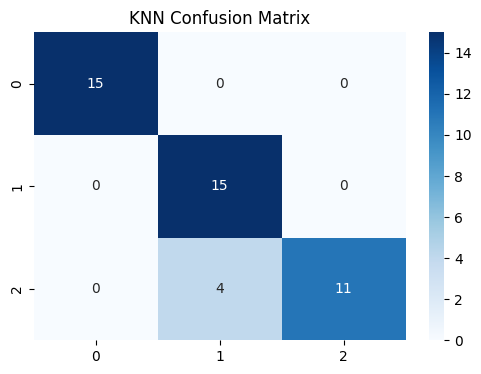

In [5]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("KNN Confusion Matrix")
plt.show()


## Choosing the Best K
We can try different values of K and see which gives best accuracy.


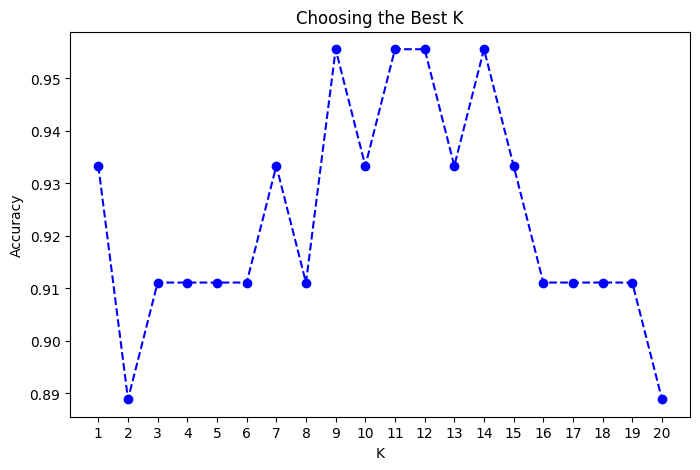

In [6]:
accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred_k = knn.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred_k))

plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.title("Choosing the Best K")
plt.xticks(k_values)
plt.show()


## 🔑 Key Takeaways
- KNN is a **simple but powerful** algorithm.
- Works well for classification & regression on small datasets.
- Feature scaling is **mandatory**.
- Picking the right **K** is crucial (cross-validation helps).
- Small K → more variance, Large K → more bias.
